In [21]:
# Loading libraries for the course
import os
import random
import urllib.request                       # Library to download data
import numpy as np                          # Library for array manipulation
import pandas as pd                         # Library to manipulate data frames
import tifffile                             # Library to store numpy arrays as TIFF
import pathlib                              # Library to work with file paths
from pathlib import Path                    # Library to work with file paths
import matplotlib.pyplot as plt             # Library used for plotting
from matplotlib.patches import Rectangle    # Module to plot a rectangle in the image
from matplotlib import animation            # Module to plot animations
import seaborn as sn                        # Library for advanced plotting
import skimage                              # Library for image manipulation (scikit-image)
from skimage.io import imread, imshow       # Module from skimage
from skimage import io, measure, filters, morphology, segmentation, color, feature
from skimage.filters import gaussian, threshold_otsu, difference_of_gaussians
from skimage.morphology import (binary_dilation, binary_erosion, binary_closing, 
                                binary_opening, disk, remove_small_objects)
from skimage.draw import polygon
from skimage.measure import regionprops
from skimage.color import label2rgb
from skimage.segmentation import watershed
from scipy import ndimage as ndi              # Distance Transform
from skimage.feature import peak_local_max    # Local maxima in a matrix
from PIL import Image
import cellpose

%matplotlib inline

from ipywidgets import interactive, HBox, VBox, Layout
import ipywidgets as widgets




In [22]:
#Metadate we want at the end of the analysis

metadata = {'frame_number':[], 'cell_number':[], 'number_of_viable_cells':[], 'cell_size':[], 'nucleus_size':[], 'protein_concentration':[], 'number_of_mRNA_in_nucleus':[], 'number_of_mRNA_in_cytoplasm':[], 'number_of_transcription_sites':[], 'intensity_of_transcription_sites':[]}


Original image shape: (21, 650, 650, 3)
Single image shape: (650, 650)


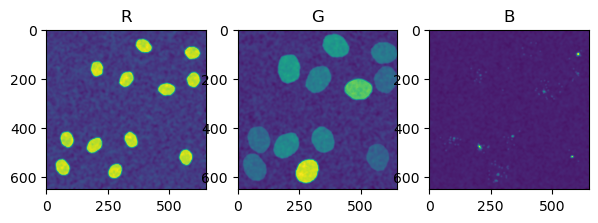

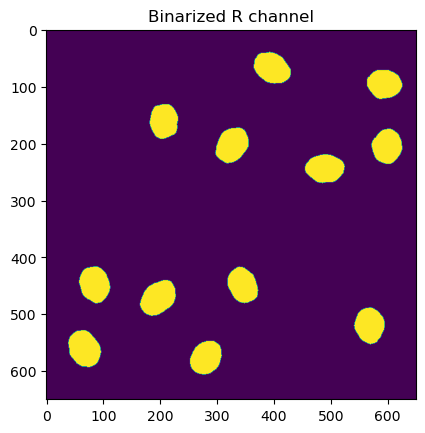

Number of cells: 12


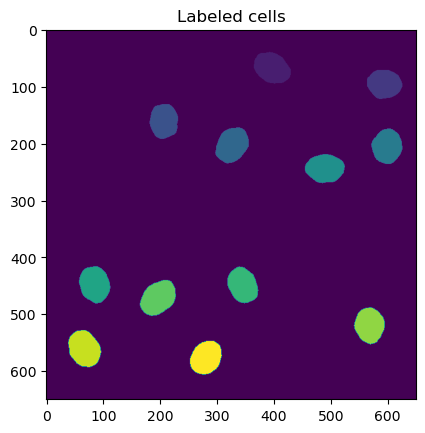

Cell areas: [2711.0, 2459.0, 2427.0, 2735.0, 2525.0, 2680.0, 2676.0, 2556.0, 2873.0, 2567.0, 2828.0, 2555.0]


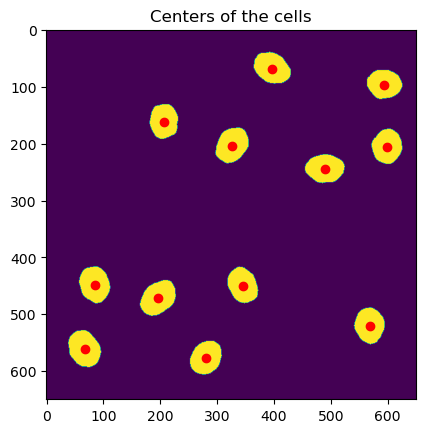

Centers of the cells: [[ 68 397]
 [ 96 594]
 [161 207]
 [203 327]
 [206 599]
 [245 490]
 [448  85]
 [450 345]
 [472 197]
 [520 568]
 [561  67]
 [577 281]]
252
252
252
252


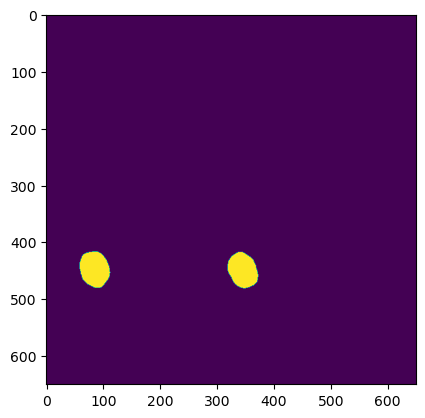

[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0]


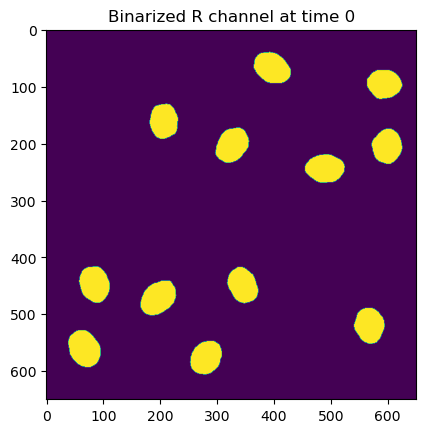

Number of cells: 12


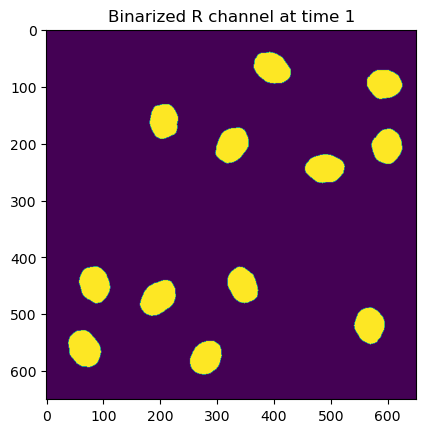

Number of cells: 12


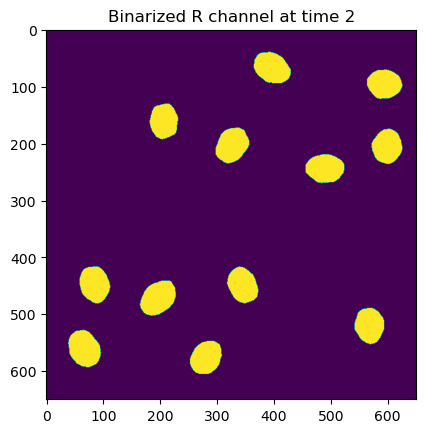

Number of cells: 12


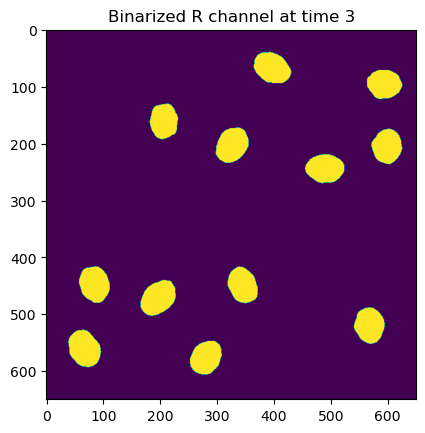

Number of cells: 12


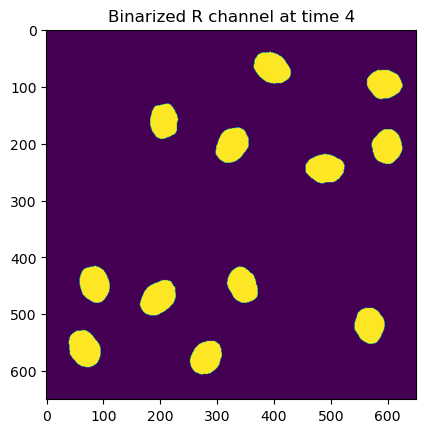

Number of cells: 12


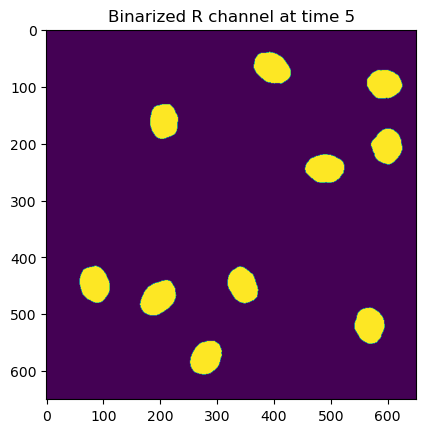

Number of cells: 10


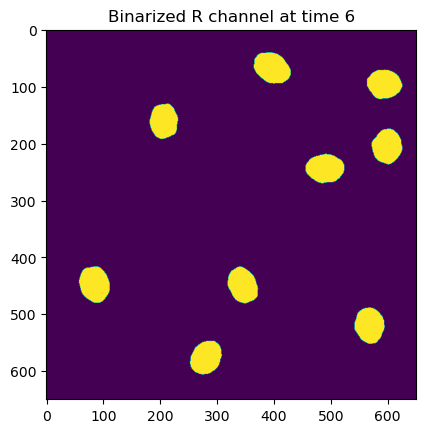

Number of cells: 9


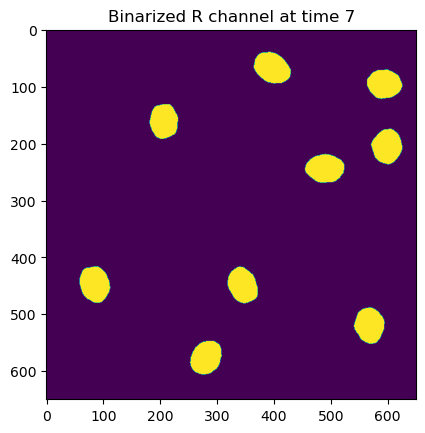

Number of cells: 9


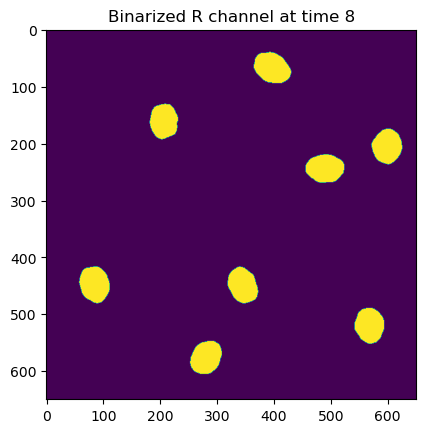

Number of cells: 8


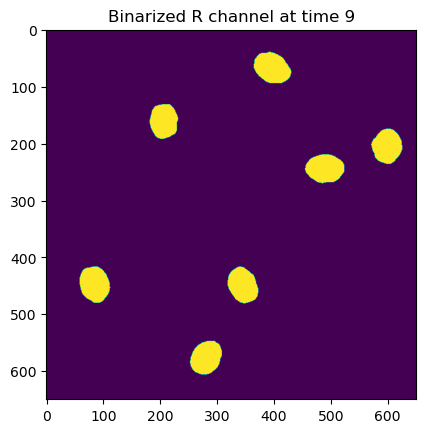

Number of cells: 7


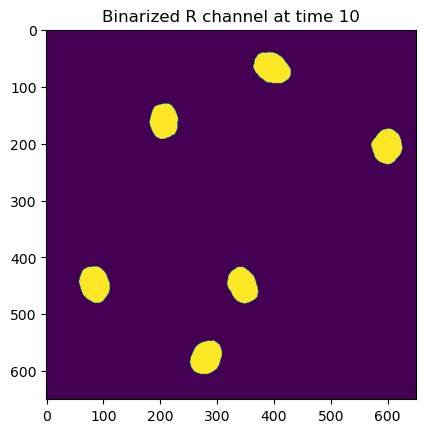

Number of cells: 6


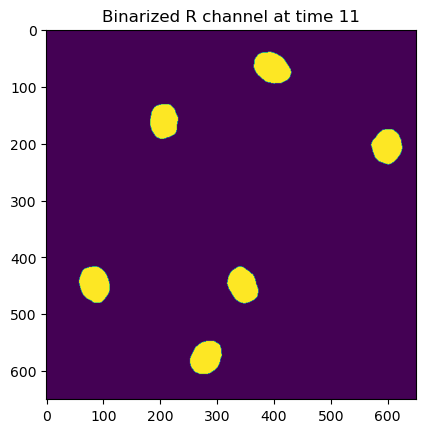

Number of cells: 6


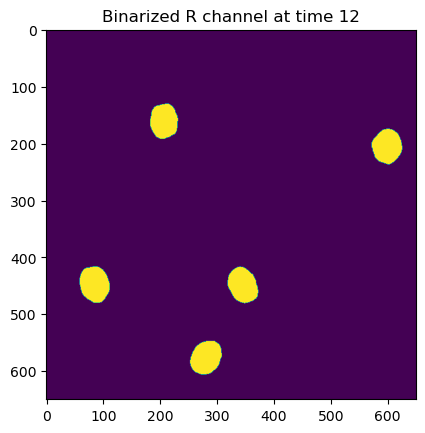

Number of cells: 5


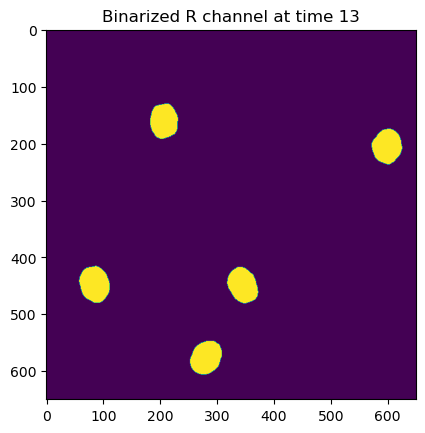

Number of cells: 5


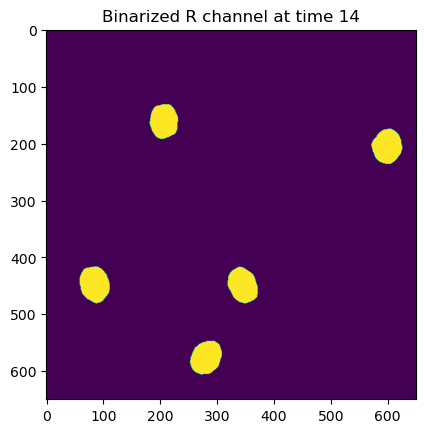

Number of cells: 5


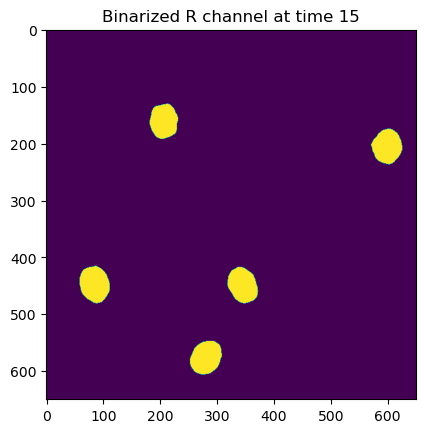

Number of cells: 5


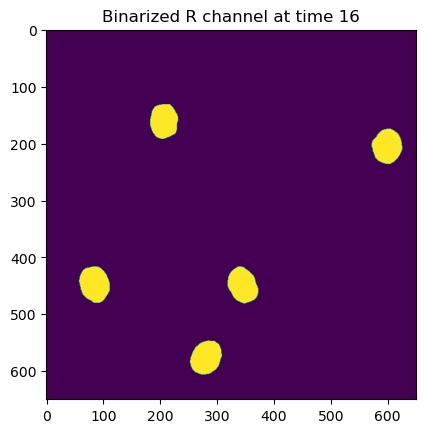

Number of cells: 5


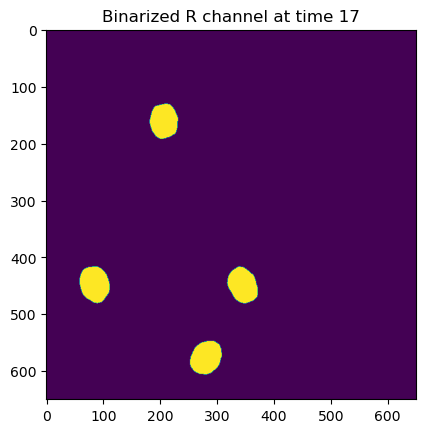

Number of cells: 4


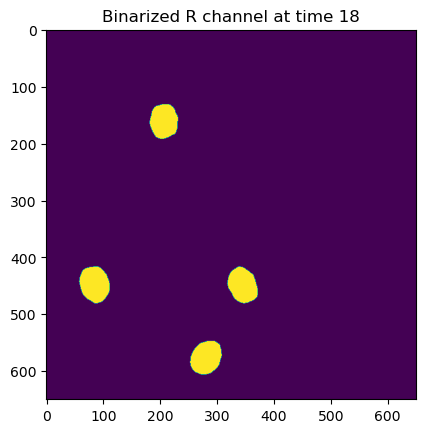

Number of cells: 4


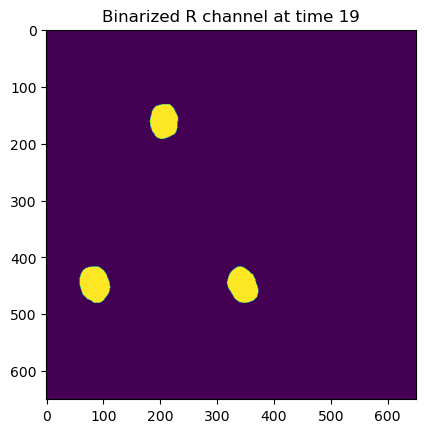

Number of cells: 3


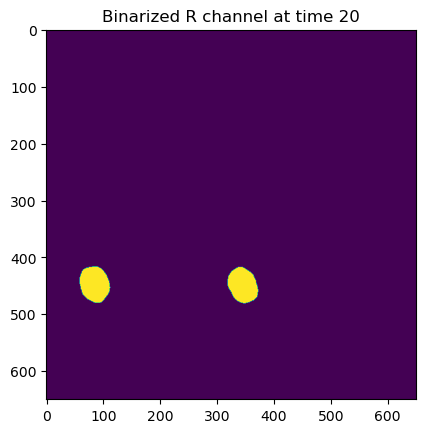

Number of cells: 2
0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 0
16 0
17 0
18 0
19 0
20 0
0 1
1 1
2 1
3 1
4 1
5 1
6 1
7 1
8 1
9 1
10 1
11 1
12 1
13 1
14 1
15 1
16 1
17 1
18 1
19 1
20 1
0 2
1 2
2 2
3 2
4 2
5 2
6 2
7 2
8 2
9 2
10 2
11 2
12 2
13 2
14 2
15 2
16 2
17 2
18 2
19 2
20 2
0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 3
8 3
9 3
10 3
11 3
12 3
13 3
14 3
15 3
16 3
17 3
18 3
19 3
20 3
0 4
1 4
2 4
3 4
4 4
5 4
6 4
7 4
8 4
9 4
10 4
11 4
12 4
13 4
14 4
15 4
16 4
17 4
18 4
19 4
20 4
0 5
1 5
2 5
3 5
4 5
5 5
6 5
7 5
8 5
9 5
10 5
11 5
12 5
13 5
14 5
15 5
16 5
17 5
18 5
19 5
20 5
0 6
1 6
2 6
3 6
4 6
5 6
6 6
7 6
8 6
9 6
10 6
11 6
12 6
13 6
14 6
15 6
16 6
17 6
18 6
19 6
20 6
0 7
1 7
2 7
3 7
4 7
5 7
6 7
7 7
8 7
9 7
10 7
11 7
12 7
13 7
14 7
15 7
16 7
17 7
18 7
19 7
20 7
0 8
1 8
2 8
3 8
4 8
5 8
6 8
7 8
8 8
9 8
10 8
11 8
12 8
13 8
14 8
15 8
16 8
17 8
18 8
19 8
20 8
0 9
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
9 9
10 9
11 9
12 9
13 9
14 9
15 9
16 9
17 9
18 9
19 9
20 9
0 10
1 10
2 10
3 10
4 10
5 10
6

In [23]:
# List directories
os.listdir()

# Set image path and read images
image_path = "Drug1_1000nM/rep1_FOV1.tif"
images = imread(image_path)

# Printing the shape of the image
print('Original image shape:', images.shape)  # [T, Y, X, C]

# Selecting a frame and a color channel
img = images[0, :, :, 0]
print('Single image shape:', img.shape)  # [Y, X]

# channel 0 - red (nucleus sizes, number of viable cells)
[T, Y, X, C] = images.shape
test_image = images.copy()
threshold = 130

# Extracting R, G, B channels from the first frame
img_R = test_image[1, :, :, 0]
img_G = test_image[1, :, :, 1]
img_B = test_image[1, :, :, 2]

# Plotting R, G, B channels
fig, ax = plt.subplots(1, 3, figsize=(7, 7))

ax[0].imshow(img_R)
ax[0].set(title='R')

ax[1].imshow(img_G)
ax[1].set(title='G')

ax[2].imshow(img_B)
ax[2].set(title='B')

plt.show()

# Take R channel and binarize it
threshold = 130
img_R_bin = img_R > threshold
img_R_bin = img_R_bin.astype(int)

# Plot binarized image
plt.imshow(img_R_bin)
plt.title('Binarized R channel')
plt.show()

# Using binarized image to get the number of cells and their middle points
# Labeling the cells
img_R_label = measure.label(img_R_bin)

# Counting the number of cells
num_cells = img_R_label.max()
print('Number of cells:', num_cells)

# Plotting the labeled cells
plt.imshow(img_R_label)
plt.title('Labeled cells')
plt.show()

# Finding the center of the cells
props = measure.regionprops(img_R_label)

# Collecting cell areas
cell_areas = [region.area for region in props]
print("Cell areas:", cell_areas)

centers = [prop.centroid for prop in props]
centers = np.array(centers)

# Plotting the centers
plt.imshow(img_R_bin)
plt.scatter(centers[:, 1], centers[:, 0], c='r')
plt.title('Centers of the cells')
plt.show()

# Round centers locations to integers
centers = np.round(centers).astype(int)
print('Centers of the cells:', centers)

# Initialize metadata
metadata = {'time': [], 'cell_number': [], 'x': [], 'y': [], 'Alive': [], 'nuclei_size': [], 'cell_size': []} 

# Append metadata with time, cell number, x, y coordinates
for i in range(num_cells):
    for j in range(T):
        metadata['time'].append(j)
        metadata['cell_number'].append(i + 1)
        metadata['x'].append(centers[i, 1])
        metadata['y'].append(centers[i, 0])

print(len(metadata['time']))
print(len(metadata['cell_number']))
print(len(metadata['x']))
print(len(metadata['y']))

# Function to check if the center points are 0 in the binarized image
def check_centers(image_array, centers):
    result = []
    for c in centers:
        x, y = c
        if image_array[x, y] == 1:
            result.append(1)  # True
        else:
            result.append(0)  # False
    return result

# Testing the check_centers function
img = test_image[20, :, :, 0]
img_bin = img > threshold
img_bin = img_bin.astype(int)
plt.imshow(img_bin)
plt.show()

result = check_centers(img_bin, centers)
print(result)

# Initialize result_all and cell_areas_all lists
result_all = []
cell_areas_all = []

# Process each time frame
for i in range(T):
    img = test_image[i, :, :, 0]
    img_bin = img > threshold
    img_bin = img_bin.astype(int)

    # Plot binarized image
    plt.imshow(img_bin)
    plt.title(f'Binarized R channel at time {i}')
    plt.show()

    # Check if centers are still 0 in the binarized image
    result = check_centers(img_bin, centers)
    result_all.append(result)

    img_R_label = measure.label(img_bin)
    num_cells = img_R_label.max()
    print('Number of cells:', num_cells)

    props = measure.regionprops(img_R_label)
    cell_areas = [region.area for region in props]

    new_vector = np.zeros(len(centers))
    for t in range(sum(np.array(result) == 1)):
        new_vector[np.where(np.array(result) == 1)[0][t]] = cell_areas[t]

    cell_areas_all.append(new_vector)

result_all = np.array(result_all)
cell_areas_all = np.array(cell_areas_all)

# Append results to metadata
for d in range(len(result_all[0])):
    for z in range(T):
        metadata['Alive'].append(result_all[z, d])
        metadata['nuclei_size'].append(cell_areas_all[z, d])
        print(z, d)

# Debug: Print lengths of metadata fields
for key in metadata:
    print(f"Length of {key}: {len(metadata[key])}")


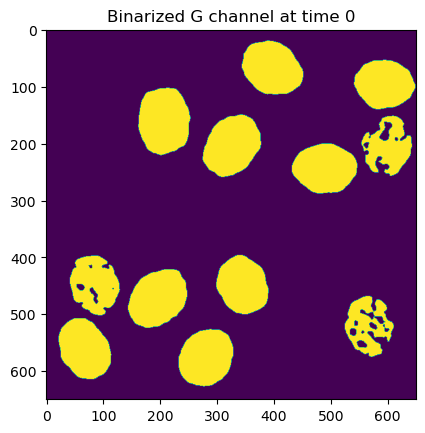

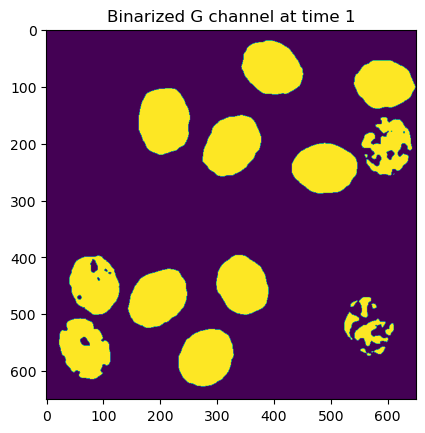

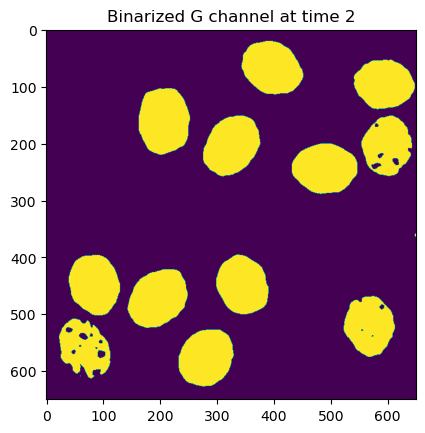

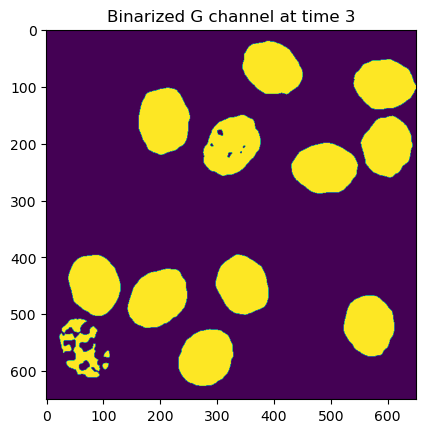

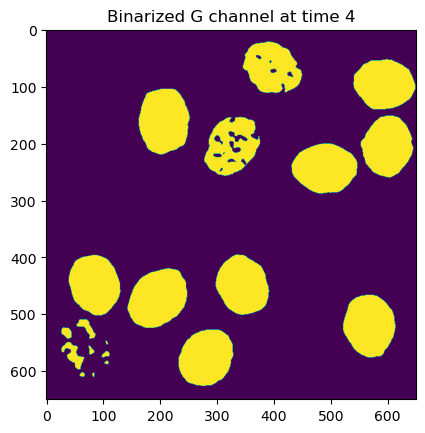

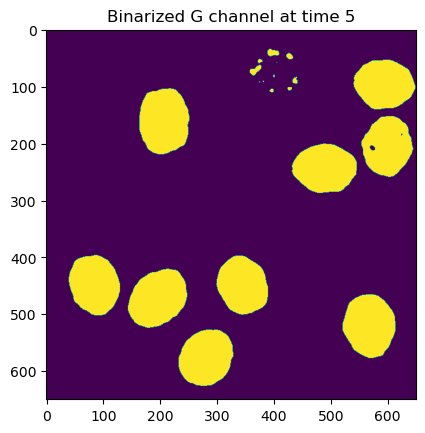

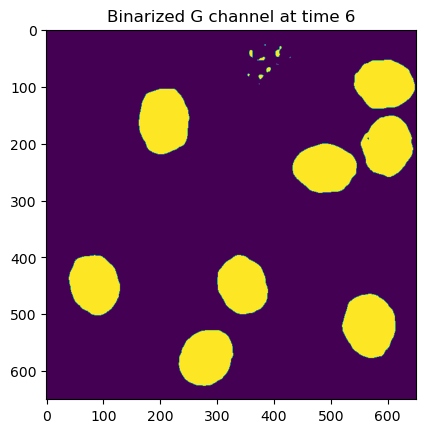

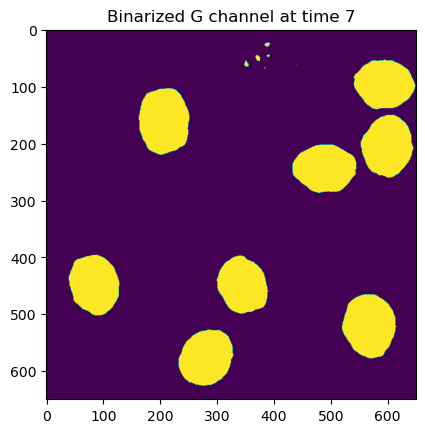

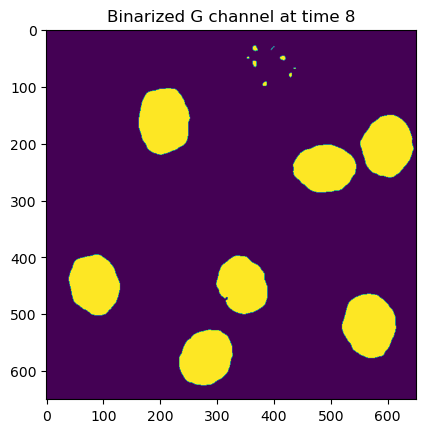

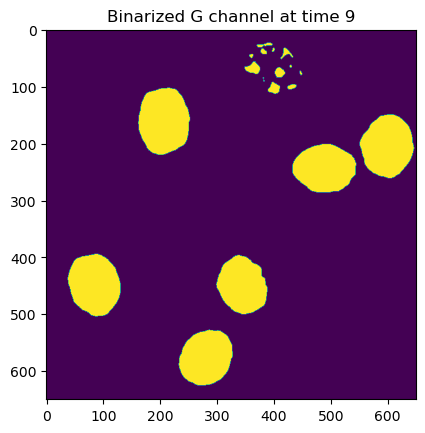

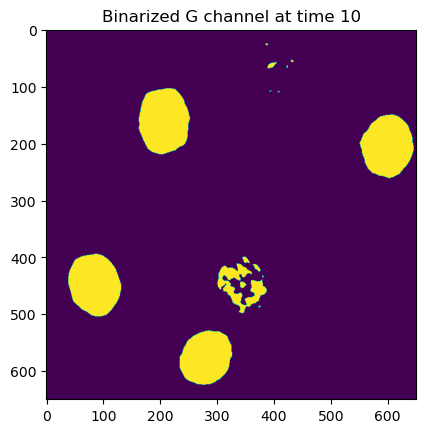

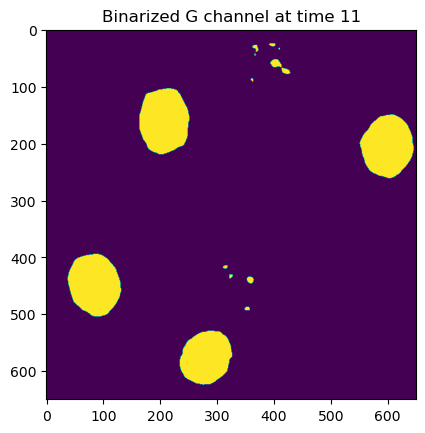

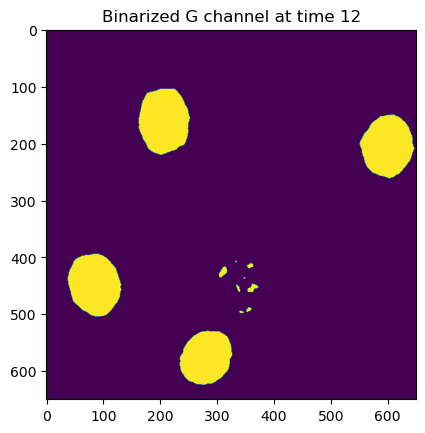

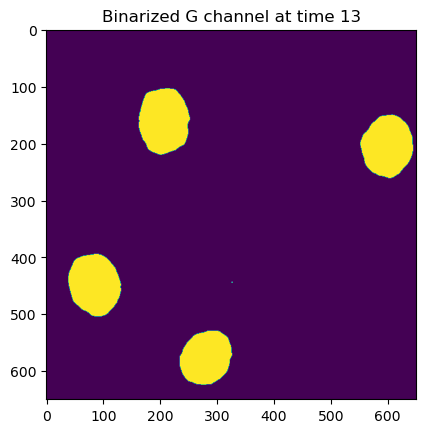

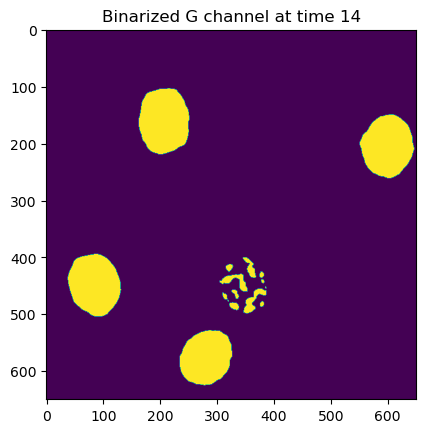

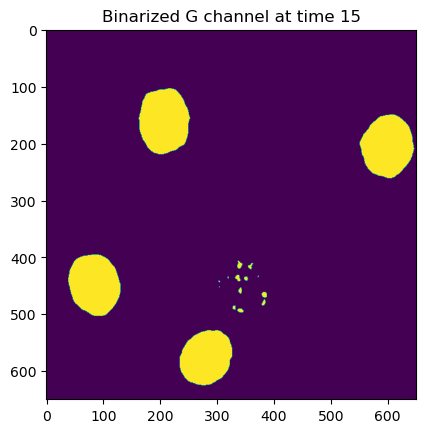

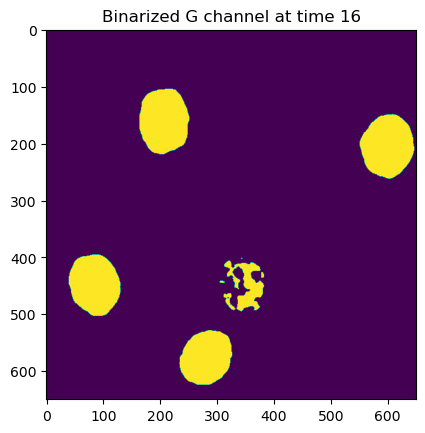

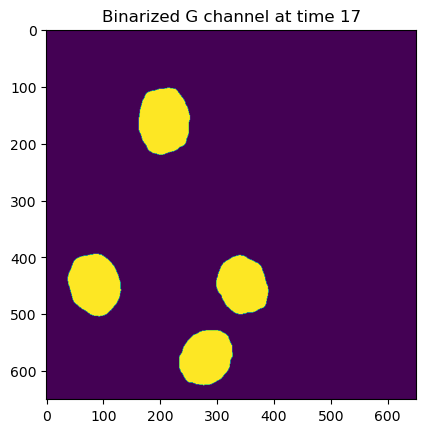

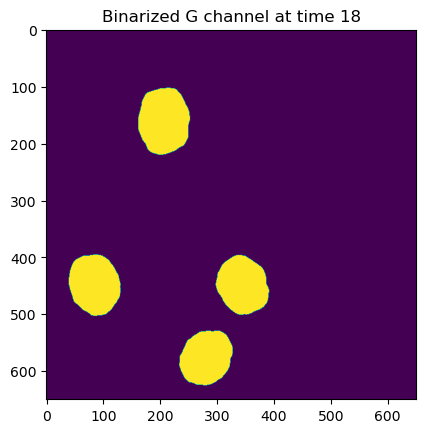

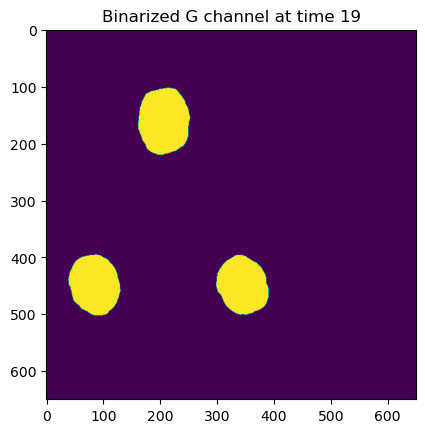

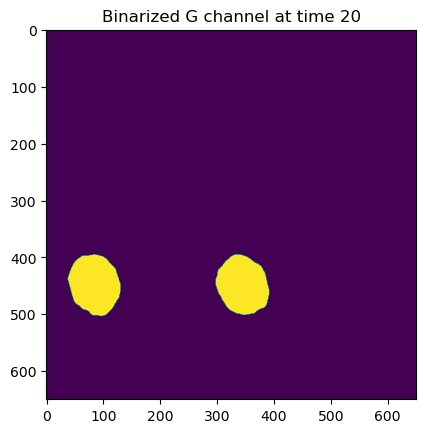

In [24]:

# Using the green channel to obtain cell size
cell_sizes_all = []
for i in range(T):
    img_G = test_image[i, :, :, 1]
    
    # Apply Gaussian filter
    img_G_blur = gaussian(img_G, sigma=1) #sigma is the standard deviation of the gaussian kernel used for the filtering operation 
    # can i use a different sigma value? what is the best sigma value for this image?
    
    # Threshold the image
    threshold_G = threshold_otsu(img_G_blur) #this threshold is not working well for this image
    img_G_bin = img_G_blur > threshold_G

    #i want to plot the image to see the threshold
    plt.imshow(img_G_bin)
    plt.title(f'Binarized G channel at time {i}')
    plt.show()

    # Label the cells
    img_G_label = measure.label(img_G_bin)
    
    # Measure cell sizes
    props_G = measure.regionprops(img_G_label)
    cell_sizes_frame = [prop.area for prop in props_G]
    
    # Create vector for cell sizes aligned with centers
    new_vector = np.zeros(len(centers))
    for t in range(min(len(cell_sizes_frame), len(new_vector))):
        new_vector[t] = cell_sizes_frame[t]
    
    cell_sizes_all.append(new_vector)

cell_sizes_all = np.array(cell_sizes_all)

# Add cell sizes to metadata

for d in range(len(result)):
    for z in range(T):
        metadata['cell_size'].append(cell_sizes_all[z,d])




In [25]:
metadata_df = pd.DataFrame(metadata)
metadata_df.to_csv('metadata_pilar.csv')